In [1]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from RBM import showConfusionMatrix
from RBM import oneHotEncoder

%matplotlib inline

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

train_img = mnist.train.images
train_label = mnist.train.labels

test_img = mnist.test.images
test_label = mnist.test.labels

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Tensor Flow Analysis
100th Iteration, Training Error Rate: 	 0.13336366415
100th Iteration, Testing Error Rate: 	 0.122699975967


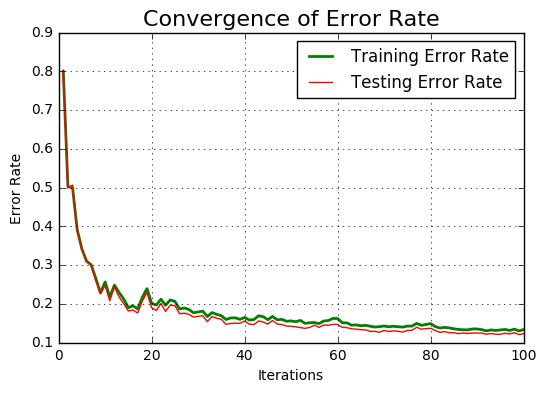

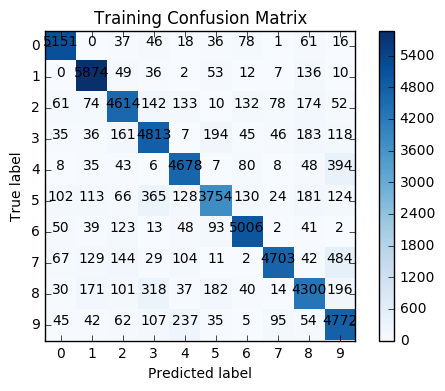

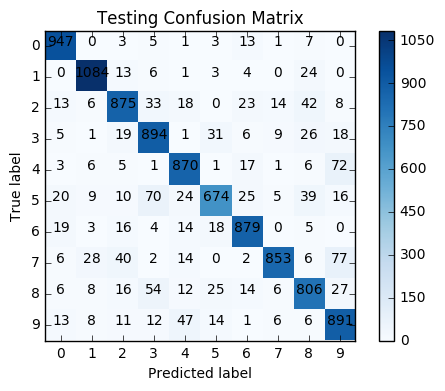

In [5]:
# begin the session
sess = tf.Session()

# Create the model
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax(tf.matmul(x, W) + b)

# Define loss
y_ = tf.placeholder(tf.float32, [None, 10])
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

# Define optimizer
learning_rate = 0.15  # learning rate
train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)

# Test trained model on training set
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
prediction = tf.argmax(y, 1)

# define accuracy variable to record the process
trainAcc = []
testAcc = []

# Train steps
init = tf.initialize_all_variables()  # initialize the model
sess.run(init)

# begin training
max_iteration = 100
for i in range(max_iteration):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, {x: batch_xs, y_: batch_ys})
    
    # keep recording the accuracy
    trainAcc.append(sess.run(accuracy, feed_dict={x: train_img, y_: train_label}))
    testAcc.append(sess.run(accuracy, feed_dict={x: test_img, y_: test_label}))

# Test trained model on evaluation set
print('Tensor Flow Analysis')
print(str(max_iteration) + "th Iteration, Training Error Rate: \t",
      1 - sess.run(accuracy, feed_dict={x: train_img, y_:train_label}))
print(str(max_iteration) + "th Iteration, Testing Error Rate: \t",
      1 - sess.run(accuracy, feed_dict={x: test_img, y_: test_label}))

train_prediction = sess.run(prediction, feed_dict={x: train_img})
test_prediction = sess.run(prediction, feed_dict={x: test_img})
trainMatrix = np.dot(train_label.T, oneHotEncoder(np.array([train_prediction]).T, 10))
testMatrix = np.dot(test_label.T, oneHotEncoder(np.array([test_prediction]).T, 10))

# close the session
sess.close()

# plot the result
fig, ax = plt.subplots()
ax.plot(range(1, max_iteration + 1), 1 - np.array(trainAcc), 
        'g', linewidth=2, label='Training Error Rate')
ax.plot(range(1, max_iteration + 1), 1 - np.array(testAcc), 
        'r', label='Testing Error Rate')
ax.set_xlabel('Iterations', fontsize=10)
ax.set_ylabel('Error Rate', fontsize=10)
ax.set_title('Convergence of Error Rate', fontsize=16)
ax.legend(loc=1, fontsize=12)
ax.grid('on')
# fig.savefig('./result/tensorflow.pdf')
plt.show()

# plot the training and test confusion matrix
fig1 = showConfusionMatrix(trainMatrix.astype(int), title='Training Confusion Matrix', 
                          label=[str(i) for i in range(10)])
fig1.savefig('./result/trainMatrix.pdf')

fig2 = showConfusionMatrix(testMatrix.astype(int), title='Testing Confusion Matrix', 
                          label=[str(i) for i in range(10)])
fig2.savefig('./result/testMatrix.pdf')